# Analyzing Consumer Complaints with Pandas and Python 3
I found a really neat data source online on unwanted robocalls that the FCC (Federal Communications Commission, a United States government agency) is tracking. Consumers complaints are being tracked in an openly available database.

Let's download it and see what it contains!

In [2]:
%%bash
wget https://consumercomplaints.fcc.gov/hc/theme_assets/513073/200051444/Telemarketing_RoboCall_Weekly_Data.csv

--2015-11-07 16:54:19--  https://consumercomplaints.fcc.gov/hc/theme_assets/513073/200051444/Telemarketing_RoboCall_Weekly_Data.csv
Resolving consumercomplaints.fcc.gov... 192.161.148.10
Connecting to consumercomplaints.fcc.gov|192.161.148.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1789741 (1.7M) [application/vnd.ms-excel]
Saving to: 'Telemarketing_RoboCall_Weekly_Data.csv'

     0K .......... .......... .......... .......... ..........  2%  108K 16s
    50K .......... .......... .......... .......... ..........  5%  233K 11s
   100K .......... .......... .......... .......... ..........  8%  667K 8s
   150K .......... .......... .......... .......... .......... 11%  420K 7s
   200K .......... .......... .......... .......... .......... 14%  978K 6s
   250K .......... .......... .......... .......... .......... 17%  698K 5s
   300K .......... .......... .......... .......... .......... 20%  430K 4s
   350K .......... .......... .......... .......... ..

## Reading the Data
Using the convenient `read_csv` method, we can automatically turn a `.csv` file into a pandas DataFrame.

In [1]:
from pandas import read_csv
s = read_csv('Telemarketing_RoboCall_Weekly_Data.csv')
s

,Phone Issues,Time of Issue,Caller ID Number,Advertiser Business Phone Number,Type of Call or Message (Robocalls),Type of Call or Message (Telemarketing),State,Date (Ticket Date of Issue),Date (Ticket Created)
0,Telemarketing (including do not call and spoof...,-,-,-,NaN,NaN,Pennsylvania,NaN,10/1/2015
1,Telemarketing (including do not call and spoof...,8:20 AM,610-990-4243,610-990-4243,NaN,Abandoned Calls,Pennsylvania,7/1/2014,10/1/2015
2,Telemarketing (including do not call and spoof...,2:00 p.m.,469-656-8497,-,NaN,Prerecorded Voice,Pennsylvania,9/20/2015,10/1/2015
3,Telemarketing (including do not call and spoof...,11:46 AM,717-657-3334,-,NaN,Abandoned Calls,Pennsylvania,9/23/2015,10/1/2015
4,Robocalls,3:19 p.m.,415-946-5707,-,Prerecorded Voice,NaN,Pennsylvania,9/28/2015,10/1/2015
5,Telemarketing (including do not call and spoof...,12:00 PM,215-624-8359,-,NaN,Live Voice,Pennsylvania,9/29/2015,10/1/2015
6,Telemarketing (including do not call and spoof...,11:00 AM,202-470-3314,-,NaN,Live Voice,Pennsylvania,10/1/2015,10/1/2015
7,Telemarketing (including do not call and spoof...,10:21 AM,567-263-0009,-,NaN,Live Voice,Pennsylvania,10/1/2015,10/1/2015
8,Telemarketing (including do not call and spoof...,1:02 PM,215-763-3788,-,NaN,Prerecorded Voice,Pennsylvania,10/1/2015,10/1/2015
9,Telemarketing (including do not call and spoof...,12:58 p.m.,717-245-2434,-,NaN,Prerecorded Voice,Pennsylvania,10/1/2015,10/1/2015


Excellent! As we can see, the DataFrame contains a lot of useful information. There is the number of a caller, the type of call, the reason for reporting it, in which state of the US it happened and finally time and date.

## Extracting Information
What interests me the most, is in which hour of the day most robocalls are being placed at consumer's homes. First, let's create a Series from the 'Time of Issue' column.

In [50]:
s['Time of Issue']

,Time of Issue
0,-
1,8:20 AM
2,2:00 p.m.
3,11:46 AM
4,3:19 p.m.
5,12:00 PM
6,11:00 AM
7,10:21 AM
8,1:02 PM
9,12:58 p.m.


The column is not well formatted, as 'AM' and 'PM' appear in different spellings. In order to extract useful information, we need to parse the time information first.

In [32]:
from datetime import datetime, time
def parse_time(raw_time):
    if raw_time == '-':
        return None
    # This is why we can't have nice things
    raw_time = raw_time.upper().replace(".", "").replace(",", "").replace(
        ":", "").replace(">", "").replace("?", "").replace("  ", " ").replace("MM", "M").zfill(7)
    if raw_time[:2] == "00":
        raw_time = raw_time[1:]
    # Need to use datetime, time has no "strptime"
    dt =  datetime.strptime(
        raw_time,
        "%I%M %p",
    )
    return dt.hour # All this sweat and labor for an hour! Oh heavens!
actual_times = s['Time of Issue'].apply(parse_time)

Wasn't that fun? Dealing with messy data is a challenge, but can be mastered through continuous application of brute-force and being in denial about reality. A steady supply of coffee helps as well.

Now that we have the actual times, I would like to retrieve the most frequent hour. Let's do this!

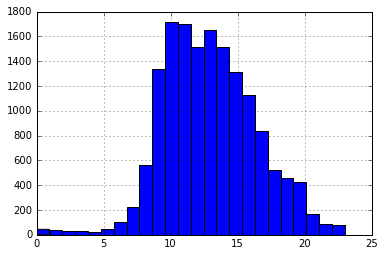

In [60]:
%matplotlib inline
actual_times.hist(bins=24)

Aha! Most robo calls get placed around 10-11 AM!